<a href="https://colab.research.google.com/github/fgith/data-science/blob/main/deep-learning/computer-vision/villain_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import layers as tfl
import os
import cv2
from sklearn import preprocessing
from pathlib import Path
from PIL import Image

In [33]:
pd.set_option('max_rows', 99999)
pd.set_option('max_colwidth', 400)
pd.describe_option('max_colwidth')

display.max_colwidth : int or None
    The maximum width in characters of a column in the repr of
    a pandas data structure. When the column overflows, a "..."
    placeholder is embedded in the output. A 'None' value means unlimited.
    [default: 50] [currently: 400]


In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json
#!kaggle datasets list

In [34]:
!kaggle datasets download -d ujjwalchowdhury/yoga-pose-classification

yoga-pose-classification.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip yoga-pose-classification.zip

In [36]:
!pip install split-folders
import splitfolders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [37]:
input_folder = "../content/YogaPoses/"
output_folder = "../content/output_folder" #where you want the split datasets saved. one will be created if it does not exist or none is set

splitfolders.ratio(input_folder, output=output_folder, seed=42, ratio=(.8, .1, .1)) # ratio of split are in order of train/val/test. You can change to whatever you want. For train/val sets only, you could do .75, .25 for example.

Copying files: 988 files [00:00, 3389.06 files/s]


In [38]:
X_train, X_test, X_val, y_train, y_test, y_val = ([] for i in range(6))

In [39]:
def read_images(image_path, X_var_list, y_var_list):
  X_var_list.clear()
  y_var_list.clear()
  for folder in os.listdir(image_path):
      for img_file in os.listdir(image_path+'/'+folder+'/'):
        X_var_list.append(image_path+'/'+folder+'/'+img_file)
        y_var_list.append(folder)
  return X_var_list, y_var_list

In [40]:
X_train, y_train = read_images("../content/output_folder/train", X_train, y_train)
X_test, y_test = read_images("../content/output_folder/test", X_test, y_test)
X_val, y_val = read_images("../content/output_folder/val", X_val, y_val)

In [42]:
print(X_train[0])
print(len(X_test))
print(X_val)
print(y_val)

../content/output_folder/train/Downdog/00000297.jpg
105
['../content/output_folder/val/Downdog/00000295.jpg', '../content/output_folder/val/Downdog/00000142.jpg', '../content/output_folder/val/Downdog/00000310.jpg', '../content/output_folder/val/Downdog/00000089.jpg', '../content/output_folder/val/Downdog/00000201.jpg', '../content/output_folder/val/Downdog/00000143.jpg', '../content/output_folder/val/Downdog/00000055.jpg', '../content/output_folder/val/Downdog/00000075.jpg', '../content/output_folder/val/Downdog/00000053.jpg', '../content/output_folder/val/Downdog/00000414.jpg', '../content/output_folder/val/Downdog/00000347.jpg', '../content/output_folder/val/Downdog/00000001.jpg', '../content/output_folder/val/Downdog/00000346.jpg', '../content/output_folder/val/Downdog/00000404.jpg', '../content/output_folder/val/Downdog/00000176.jpg', '../content/output_folder/val/Downdog/00000422.jpg', '../content/output_folder/val/Downdog/00000115.jpg', '../content/output_folder/val/Downdog/0000

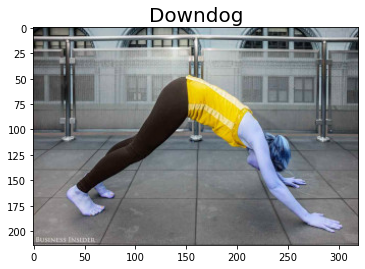

In [45]:
# checking train path
x=50
image = cv2.imread(X_train[x]) 

# the first image bleongs to clean directory under train
plt.imshow(image)
plt.title(y_train[x], fontsize = 20)
#plt.axis('on')
plt.show()